# The Data Incubator Challenge

Diabetes is a group of desorders characterized by chronic high blood glucose levels, or hyperglycemia, due to the body's inability to produce any or enough insulin to regulate high glucose levels. There are two main types of diabetes. The type 1 occurs in children or adolescents as they deficiently do not produce insulin, or type 2, which occurs as a result of a progressive insulin resistence. Type 2 diabetes is more prevalent than type 1, and is therefore seen in 90% of all diabetes cases. Type 2 diabetes was previously diagnosed after the age of forty, however, it is now being found in a different age groups, including children and adolescents.

The impact of diabetes is greater than hyperglycemia, being a leading cause of blindness, kidney diseases, and non-traumatic lower extremity amputations. Also, people with diabetes are two to four times more likely to develop cardiovascular complications and strokes. Diabetes and its related complications result in an estimated 200,000+ deaths each year, making diabetes one of the major causes of mortality in the U.S.

Several risk factors such as age, race, pregnancy, stress, certain medications, high cholesterol and obesity has already been described. The single best predictor of type 2 diabetes is overweight or obesity. Almost 90% of people living with type 2 diabetes are overweight or have obesity. The number of diabetes cases among American adults increased by a third during the 1990s, and additional increases are expected. This rapid increase in the occurrence of diabetes is mostly attributed to the growing prevalence of obesity in the United States.

As diabetes and obesity are strong correlated with each other, this brings us a big question: what other factors strong correlate with the development of diabetes and obesity? To answer this, I choose the Food Environment Atlas data set from the United States Department of Agriculture (USDA), which has over 275 variables covering almost all counties of all states from U.S. Is the average household income correlated with the development of diabetes and obesity? Are poverty and child poverty important factors? Are the national assistance programs important?

Data set

https://www.ers.usda.gov/data-products/food-environment-atlas/data-access-and-documentation-downloads/#Current%20Version

References

* Eckel RH, Kahn SE, Ferrannini E, Goldfine AB, Nathan DM, Schwartz MW, Smith RJ, Smith SR. Obesity and type 2 diabetes: what can be unified and what needs to be individualized? J Clin Endocrinol Metab. 2011 Jun;96(6):1654-63. doi: 10.1210/jc.2011-0585.

* Olokoba AB, Obateru OA, Olokoba LB. Type 2 diabetes mellitus: a review of current trends. Oman Med J. 2012 Jul;27(4):269-73. doi: 10.5001/omj.2012.68.

* Centers for Disease Control and Prevention. About Underlying Cause of Death 1999–2015. CDC WONDER Database. http://wonder.cdc.gov/ucd-icd10.html. Accessed April 28, 2018.

* The National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK). Statistics on Diabetes: http://www.diabetes.niddk.nih.gov/dm/pubs/statistics/. Accessed April 28, 2018.

In [1]:
# Importing the modules that will be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For Box-Cox Transformation
from scipy import stats

In [2]:
# As the USDA dataset as several Excel sheets, I created different dataframes for each...
df_access = pd.read_excel('DataDownload.xls', sheet_name = 'ACCESS')
df_rest = pd.read_excel('DataDownload.xls', sheet_name = 'RESTAURANTS')
df_insecurity = pd.read_excel('DataDownload.xls', sheet_name = 'INSECURITY')
df_prices = pd.read_excel('DataDownload.xls', sheet_name = 'PRICES_TAXES')
df_assistance = pd.read_excel('DataDownload.xls', sheet_name = 'ASSISTANCE')
df_local = pd.read_excel('DataDownload.xls', sheet_name = 'LOCAL')
df_social = pd.read_excel('DataDownload.xls', sheet_name = 'SOCIOECONOMIC')
df_health = pd.read_excel('DataDownload.xls', sheet_name = 'HEALTH')
df_stores = pd.read_excel('DataDownload.xls', sheet_name = 'STORES')

In [5]:
# ...and I created a main dataframe with all of them together.
main_df = pd.concat([df_access, df_rest, df_insecurity, df_social, df_health,
                    df_prices, df_assistance, df_local, df_stores], axis=1)
main_df.head()

,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,...,PCH_SNAPS_12_16,SNAPSPTH12,SNAPSPTH16,PCH_SNAPSPTH_12_16,WICS08,WICS12,PCH_WICS_08_12,WICSPTH08,WICSPTH12,PCH_WICSPTH_08_12
0,1001,AL,Autauga,18428.439685,17496.693038,-5.056026,33.769657,32.062255,5344.427472,6543.676824,...,12.694878,0.674004,0.760911,12.894172,6,5,-16.66667,0.119156,0.090067,-24.412460
1,1003,AL,Baldwin,35210.814078,30561.264430,-13.204891,19.318473,16.767489,9952.144027,9886.831137,...,43.192771,0.725055,0.949753,30.990390,25,27,8.00000,0.141875,0.141517,-0.252126
2,1005,AL,Barbour,5722.305602,6069.523628,6.067799,20.840972,22.105560,3135.676086,2948.790251,...,0.956938,1.280590,1.354387,5.762745,6,7,16.66667,0.201099,0.257344,27.968330
3,1007,AL,Bibb,1044.867327,969.378841,-7.224696,4.559753,4.230324,491.449066,596.162829,...,20.512821,0.719122,0.864874,20.267995,6,5,-16.66667,0.277919,0.221268,-20.383970
4,1009,AL,Blount,1548.175559,3724.428242,140.568857,2.700840,6.497380,609.027708,1650.959482,...,23.903509,0.657144,0.815946,24.165470,10,6,-40.00000,0.173028,0.103760,-40.033200


In [15]:
# Before anything else, let's see if the dataset has NaN values.
main_df.isnull().sum()

FIPS                           0
State                          0
County                         0
LACCESS_POP10                  0
LACCESS_POP15                 19
PCH_LACCESS_POP_10_15         26
PCT_LACCESS_POP10              0
PCT_LACCESS_POP15             19
LACCESS_LOWI10                 0
LACCESS_LOWI15                20
PCH_LACCESS_LOWI_10_15        28
PCT_LACCESS_LOWI10             0
PCT_LACCESS_LOWI15            20
LACCESS_HHNV10                 0
LACCESS_HHNV15                 3
PCH_LACCESS_HHNV_10_15        14
PCT_LACCESS_HHNV10             0
PCT_LACCESS_HHNV15             3
LACCESS_SNAP15                20
PCT_LACCESS_SNAP15            20
LACCESS_CHILD10                0
LACCESS_CHILD15               19
LACCESS_CHILD_10_15           28
PCT_LACCESS_CHILD10            0
PCT_LACCESS_CHILD15           19
LACCESS_SENIORS10              0
LACCESS_SENIORS15             19
PCH_LACCESS_SENIORS_10_15     26
PCT_LACCESS_SENIORS10          0
PCT_LACCESS_SENIORS15         19
          

In [16]:
# And also check its shape.
main_df.shape

(3143, 304)

As we can observe, this dataset has few variables with low amount of NaN values, which makes the analysis more easy and I can use .dropna() without losing too much data. I will use it when necessary.

All variables of this dataframe are already in an integer type. It has categorical variables represented as 1 or 0.

As diabetes is correlated to obesity, let's plot the diabetes and adult obesity rates of 2013.

C:\Users\jonas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(27.125,0.5,'Adult Diabetes rate 2013 (%)')

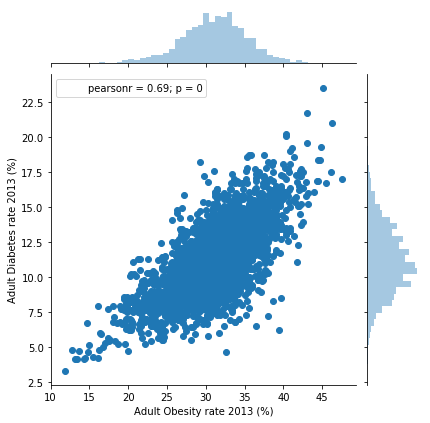

In [8]:
h = sns.jointplot(x = 'PCT_OBESE_ADULTS13', y = 'PCT_DIABETES_ADULTS13', data = main_df)
h.ax_joint.set_xlabel('Adult Obesity rate 2013 (%)')
h.ax_joint.set_ylabel('Adult Diabetes rate 2013 (%)')

We clearly can see the strong correlation between the two variables by Pearson correlation coefficient of 0.69 and a low p value. We can also observe that for partial high rates for obesity, it does not correlate well with high diabetes rates. This means that not all obese adults develop diabetes, confirming the data in literature (check references above).

Next, I first wanted to correlate the socioeconomic factors such as median holsehold income ('MEDHHINC15', dollars), poverty rate ('POVRATE15'), and child poverty rate ('CHILDPOVRATE15'), and see their correlation with diabetes ('PCT_DIABETES_ADULTS13') and obesity ('PCT_OBESE_ADULTS13').

In [17]:
# In order to do that, I created a new dataframe and removed the NaN values.
df1 = main_df[['PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS13', 'MEDHHINC15', 'POVRATE15', 'CHILDPOVRATE15']]
df1.dropna(inplace=True)
df1.shape

C:\Users\jonas\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


(3139, 5)

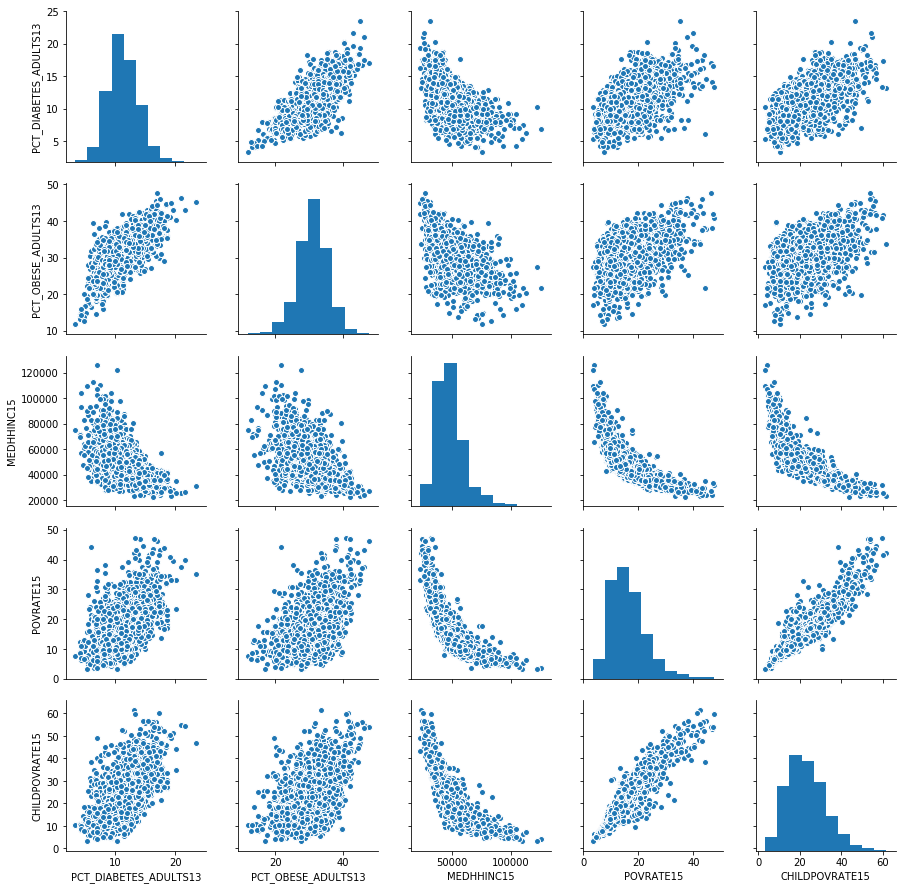

In [18]:
# plotting the pairplot.
sns.pairplot(data=df1)

We can observe that both diabetes and obesity rates negative correlate with median household income. This means that the less people earn per year, they have a chance to have diabetes or obesity. However, this can only be a partial explanation, as low income people also do not have diabetes and obesity. This might generate the question, why this partial correlation happens? The common sense tells me that is it because with low income, people tend to buy cheap products to consume? Are these cheap products containing industrialized high carbohydrates? Or fruits and vegetables? Unfortunately, I do not have all the most appropriated variables, so I will analyse the diabetes and obesity correlation with the price of sodas divided by the national average (2010), the soda sales tax in retail stores and vending machines (2014), chip and pretzel sales tax in retail stores and vending machines (2014), and general food sales tax in retail stores (2014).

It is also interest to mention that there is a weak positive relashionship between diabetes and obesity with the poverty and child poverty rate. This correlation partially confirms what was previously observed for median household income, as low income could be interpreted as porverty.

In [19]:
# let's create a new df with the new variables.
df2 = main_df[['PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS13', 'SODA_PRICE10', 'SODATAX_STORES14', 'SODATAX_VENDM14',
              'CHIPSTAX_STORES14', 'CHIPSTAX_VENDM14', 'FOOD_TAX14']]
df2.dropna(inplace=True)
df2.shape

C:\Users\jonas\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(3108, 8)

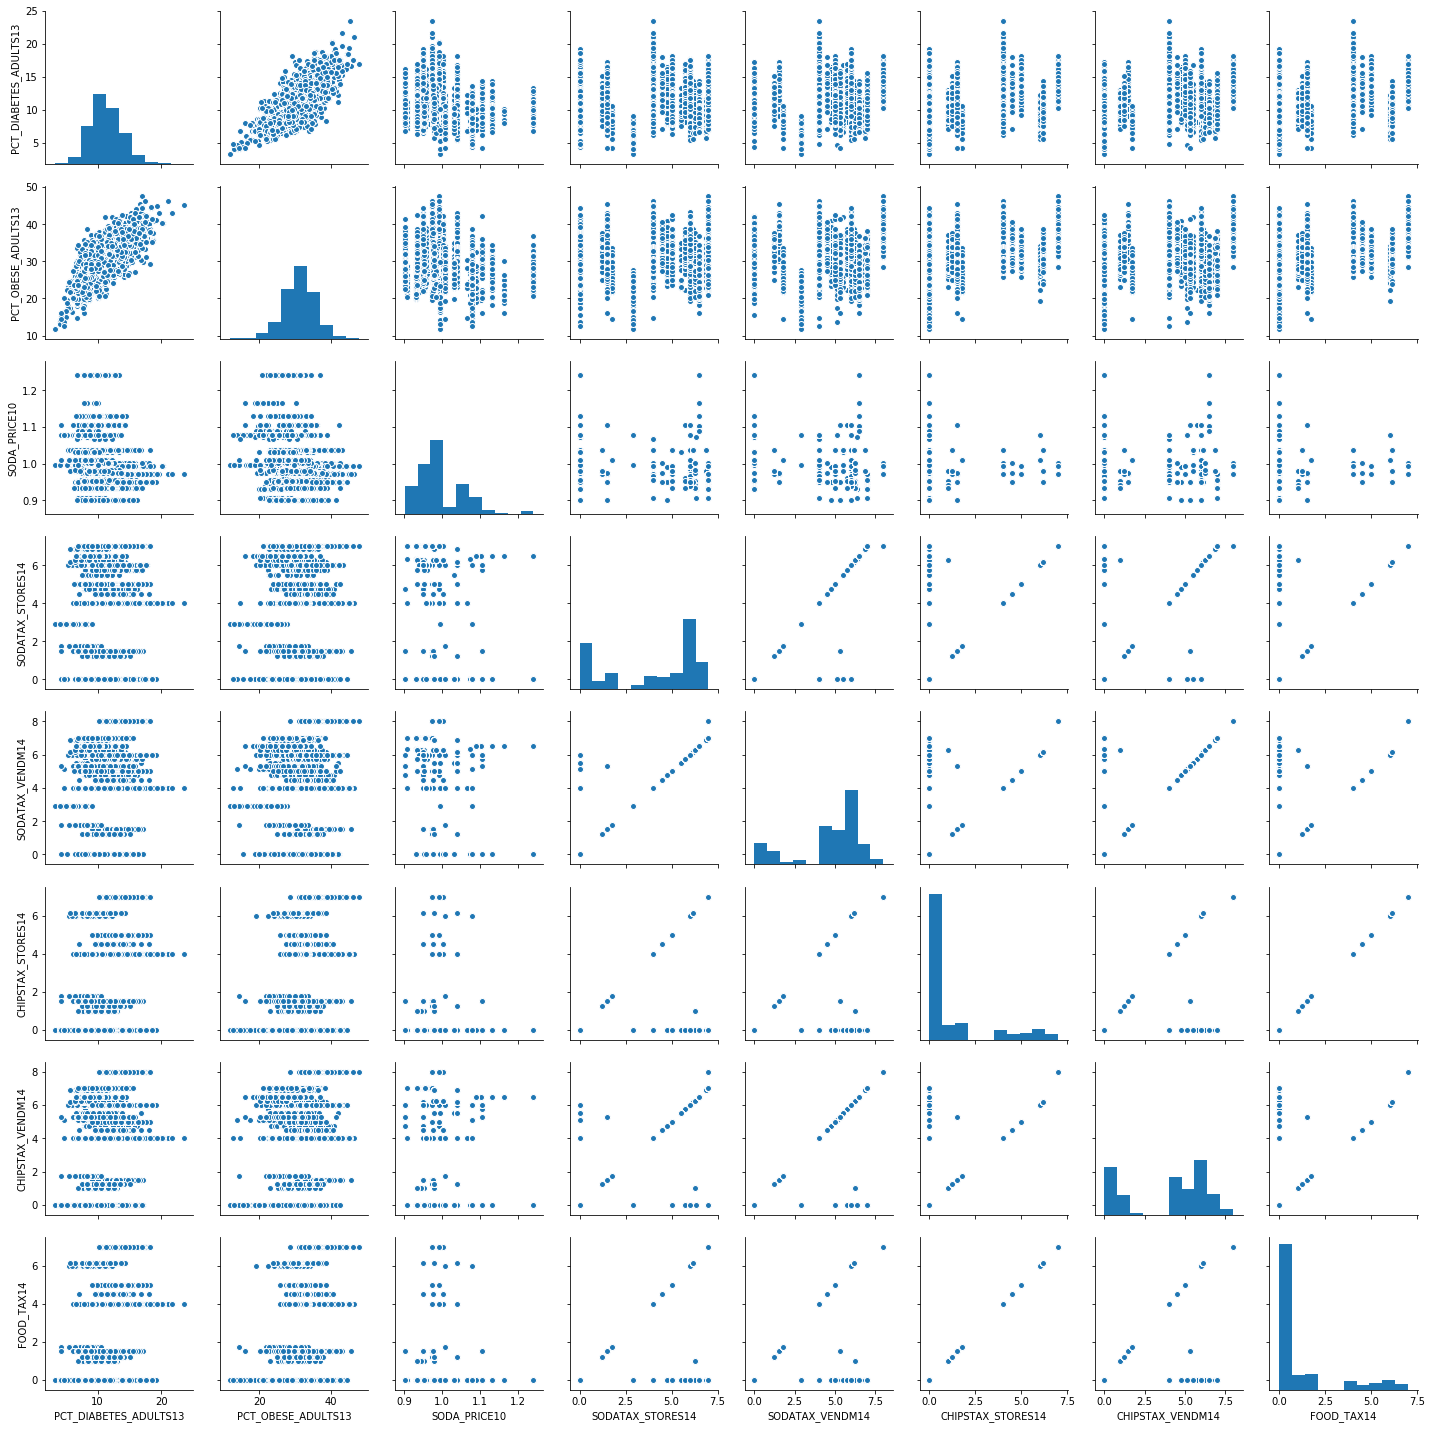

In [20]:
# plotting the pairplot.
sns.pairplot(data=df2)

We can observe that for all variables there is none correlation between diabetes and obesity. We can hypothesize that the sales tax for soda, chips and pretzels, and general food does not have a correlation with their comsuption and further development to diabetes and obesity. All people need to buy food even with high sales tax, and the lowest and highest counties with diabetes and obesity rates generally consume soda and chips.

Total sales for soda have a small decrease in the counties with maximum sales, however, I did not find a significant correlation to investigate further.

Obs: the data provided are from different years, however, we can hypothesize that obesity and diabetes can follow the same trend for 2014.

Obs2: the majority of data was not normalized, but it is clear how it does not have any correlation.

As we previously observed that low income counties partially have the tendency to have more percentage of diabetes and obesity, it makes sense ask whether this effect might be positively or negatively explained by the presence of the assitance programs like Supplemental Nutrition Assistance Program (SNAP), Women, Infants and Children (WIC), National School Lunch Program, School Breakfast Program, and Summer Food Service Program.

I used the variables for the percentage of the participants, or students eligible, for each county from different years. As some of them are school programs, it makes sense investigate the years prior 2013, which is the date for diabetes and obesity data. I will plot the years after 2013 to check if there is any change. The years will be plotted separately.

Variables used:

* PCT_SNAP12 - SNAP participants (% pop), 2012
* PCT_SNAP16 - SNAP participants (% pop), 2016
* PCT_NSLP09 - National School Lunch Program participants (% pop), 2009
* PCT_NSLP15 - National School Lunch Program participants (% pop), 2015
* PCT_FREE_LUNCH09 - Students eligible for free lunch (%), 2009
* PCT_REDUCED_LUNCH09 - Students eligible for reduced-price lunch (%), 2009
* PCT_REDUCED_LUNCH14 - Students eligible for reduced-price lunch (%), 2014
* PCT_FREE_LUNCH14 - Students eligible for free lunch (%), 2014
* PCT_SBP09 - School Breakfast Program participants (% pop), 2009
* PCT_SBP15 - School Breakfast Program participants (% pop), 2015
* PCT_SFSP09 - Summer Food Service Program participants (% pop), 2009
* PCT_SFSP15 - Summer Food Service Program participants (% pop), 2015
* PCT_WIC09 - WIC participants (% pop), 2009
* PCT_WIC15 - WIC participants (% pop), 2015

In [103]:
df3_2009 = main_df[['PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS13', 'PCT_SNAP12', 'PCT_NSLP09', 'PCT_FREE_LUNCH09',
                   'PCT_REDUCED_LUNCH09', 'PCT_SBP09', 'PCT_SFSP09', 'PCT_WIC09']]
df3_2009.dropna(inplace=True)
df3_2009.shape

C:\Users\jonas\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


(3067, 9)

In [34]:
df3_2015 = main_df[['PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS13', 'PCT_SNAP16', 'PCT_NSLP15', 'PCT_FREE_LUNCH14',
                   'PCT_REDUCED_LUNCH14', 'PCT_SBP15', 'PCT_SFSP15', 'PCT_WIC15']]
df3_2015.dropna(inplace=True)
df3_2015.shape

C:\Users\jonas\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


(2905, 9)

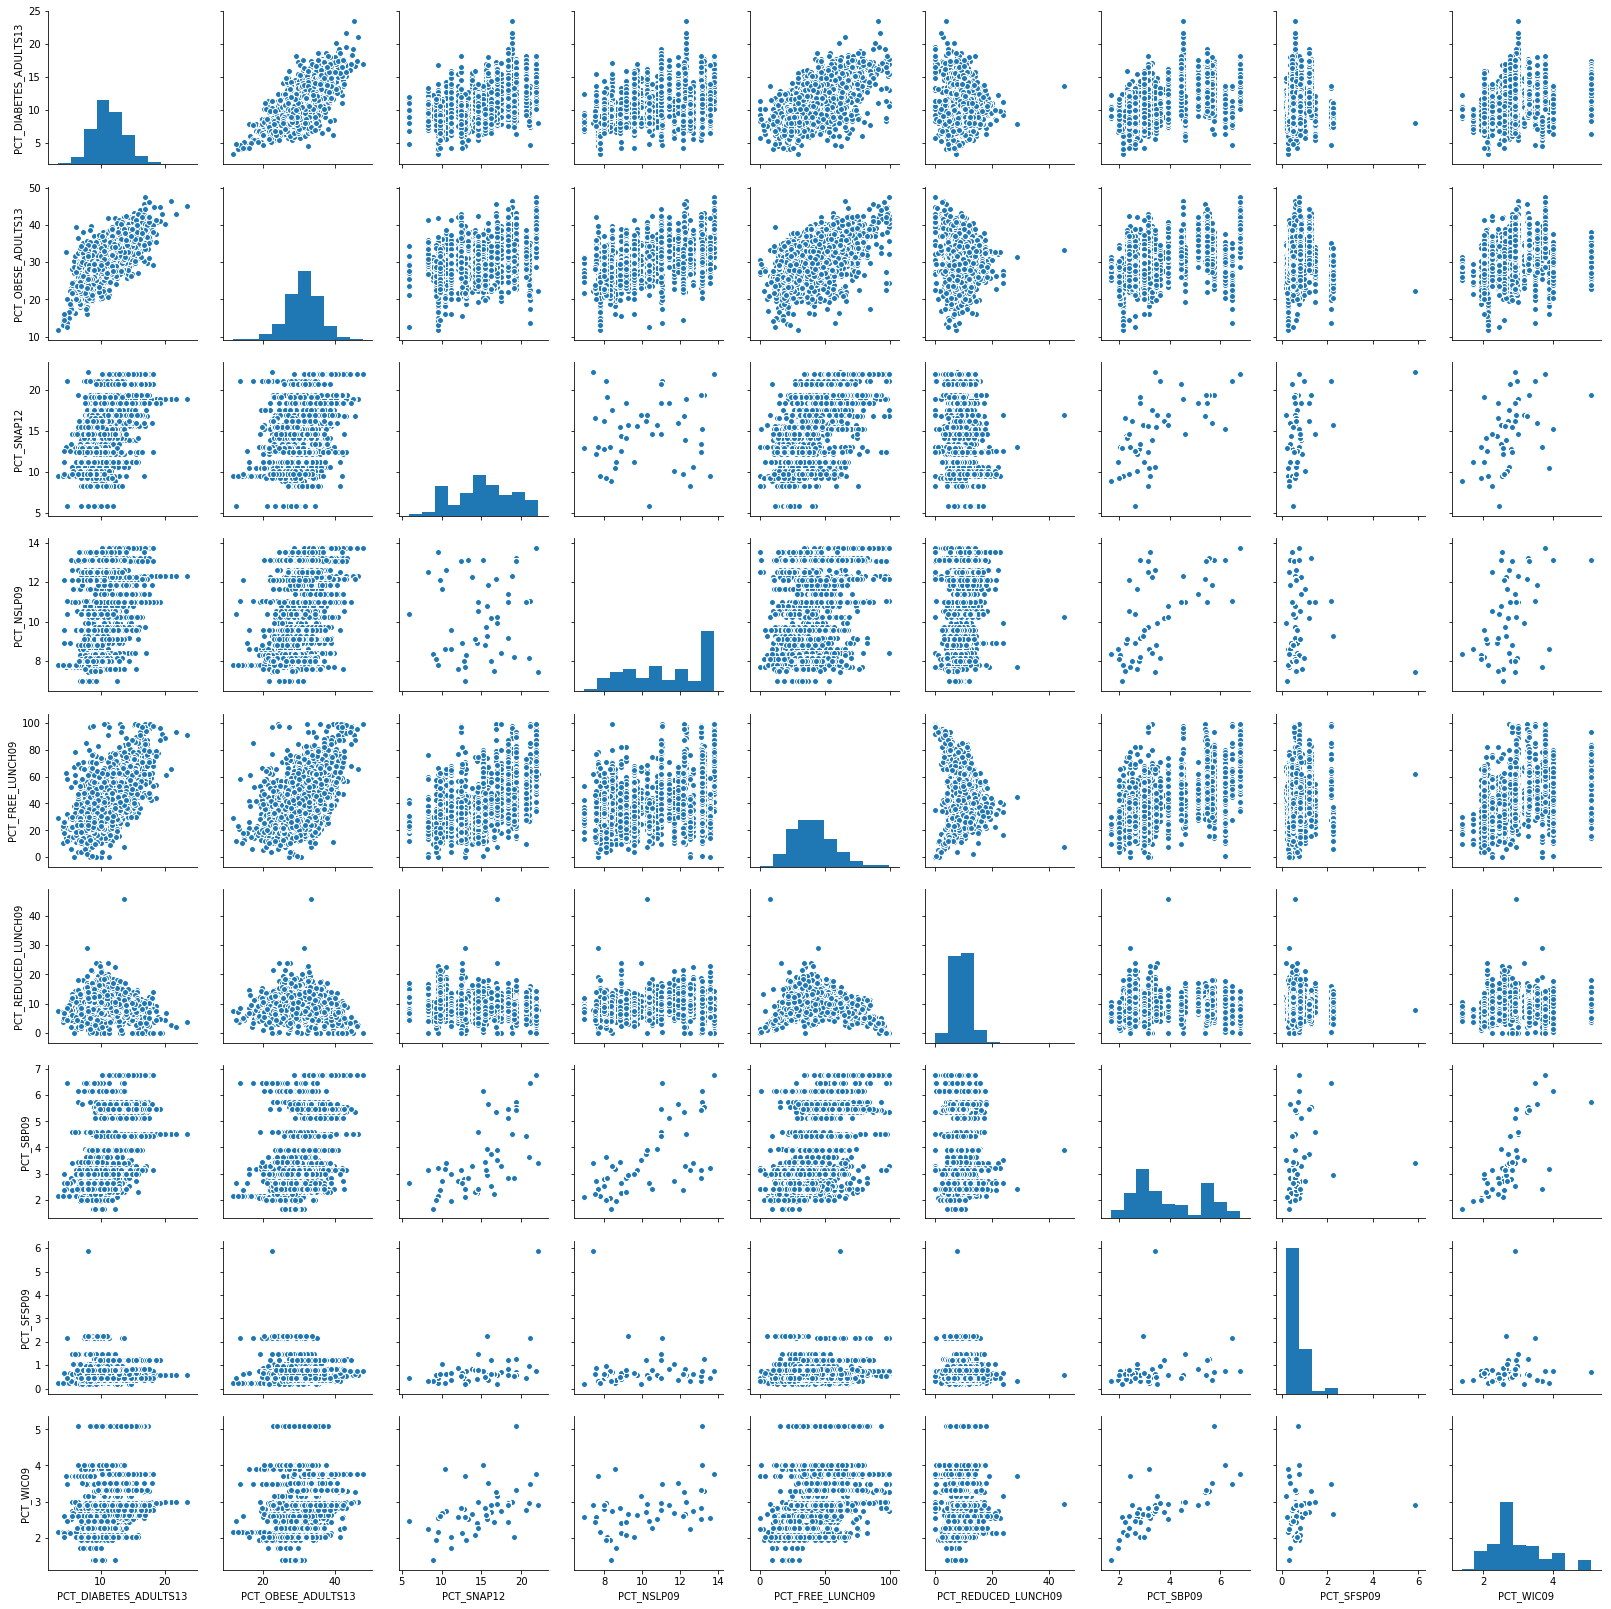

In [35]:
sns.pairplot(data=df3_2009)

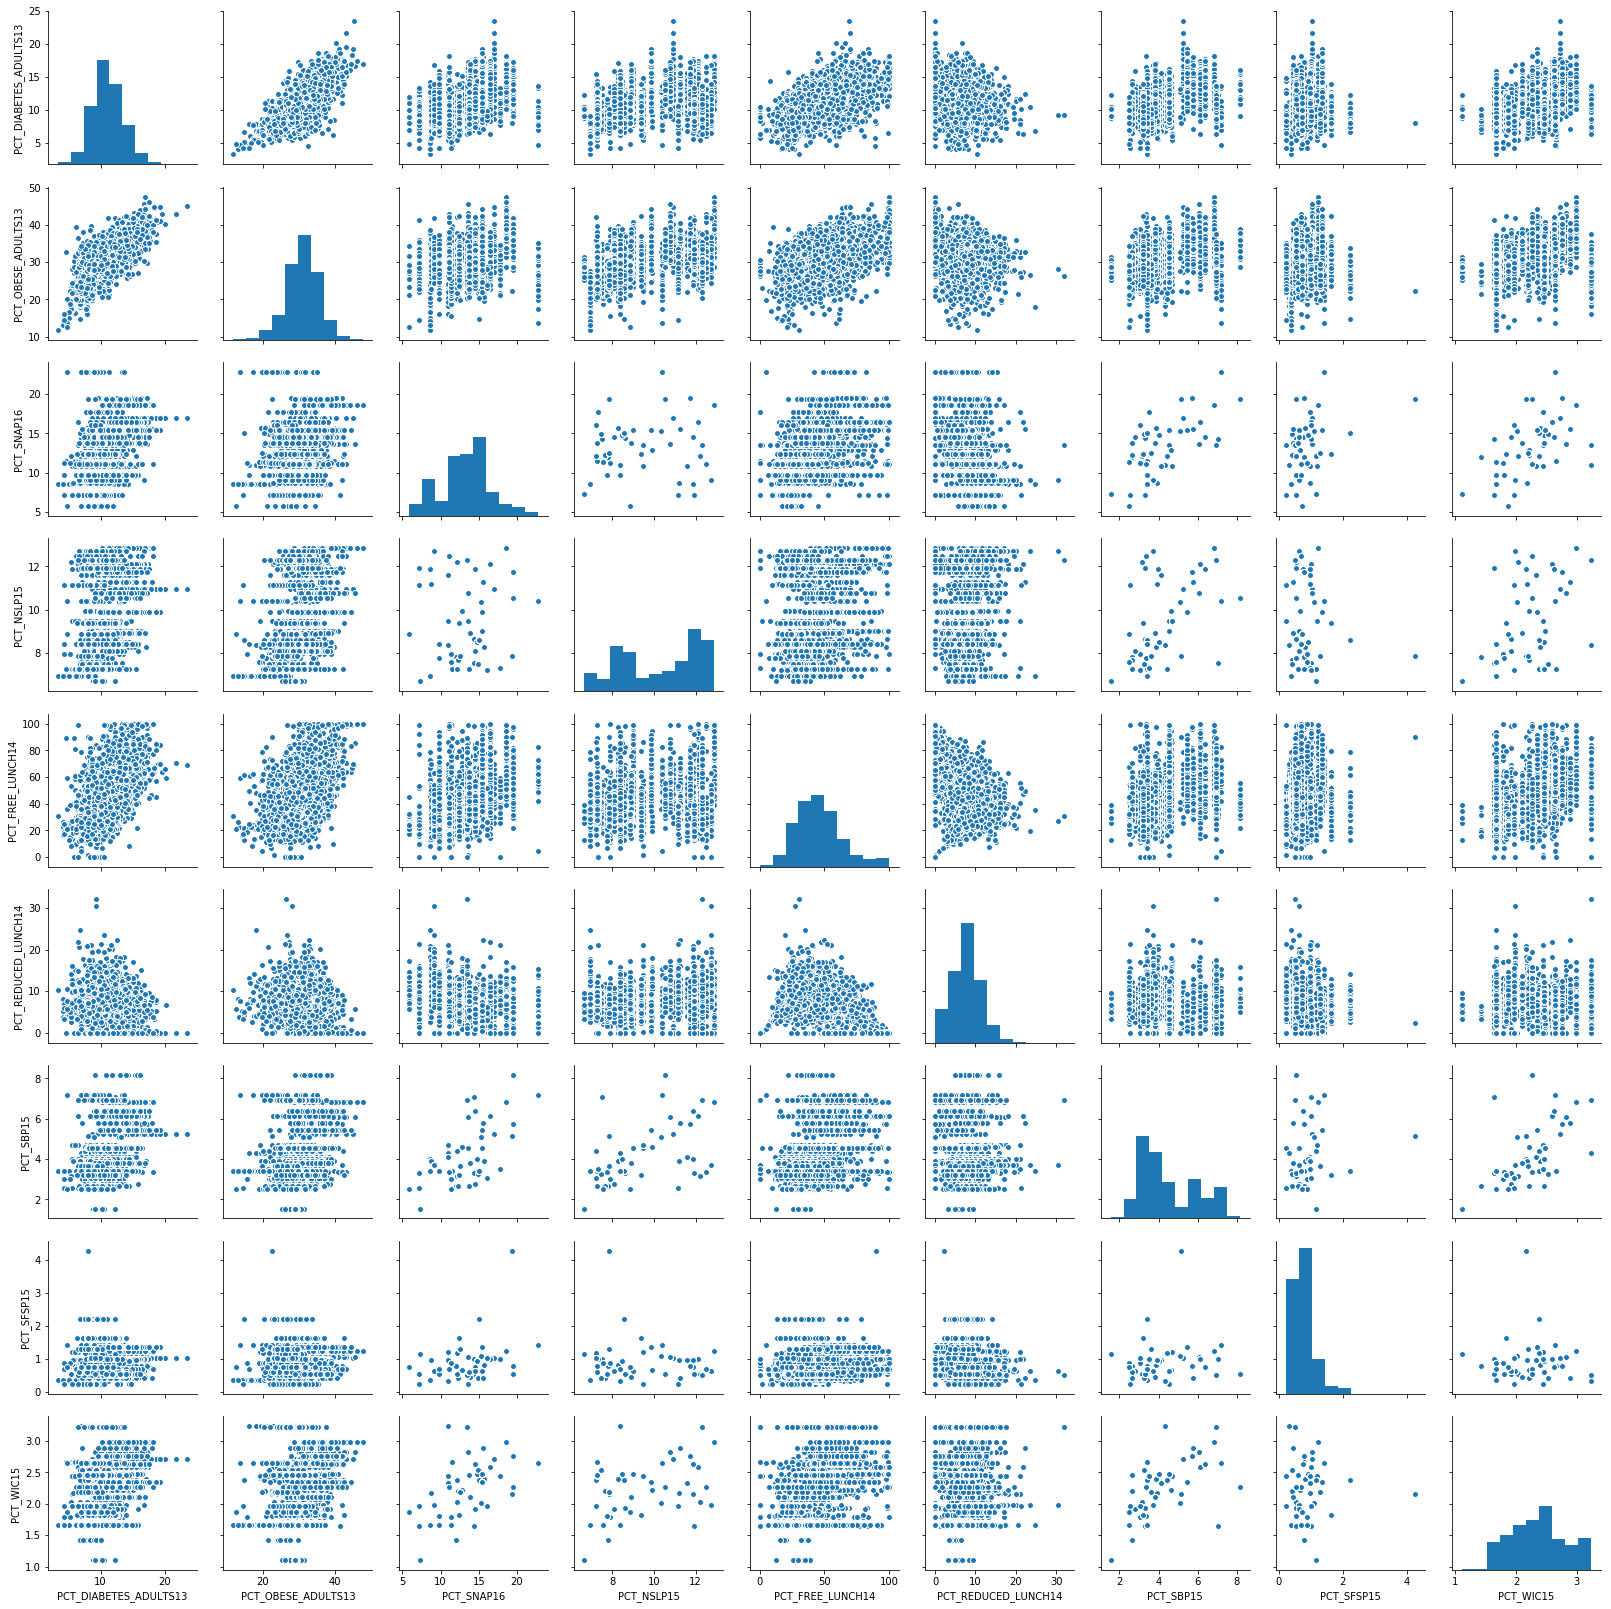

In [36]:
sns.pairplot(data=df3_2015)

For both plots, we can observe that for both diabetes and obesity, there is a positive correlation with the percentage of students eligible for free lunch. Let's take a look more closely.

C:\Users\jonas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(27.125,0.5,'Adult Diabetes rate 2013 (%)')

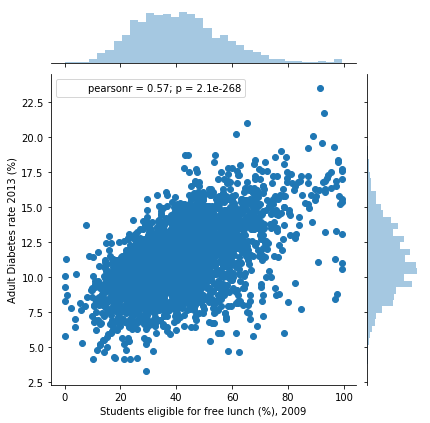

In [37]:
p1 = sns.jointplot(x = 'PCT_FREE_LUNCH09', y = 'PCT_DIABETES_ADULTS13', data = main_df)
p1.ax_joint.set_xlabel('Students eligible for free lunch (%), 2009')
p1.ax_joint.set_ylabel('Adult Diabetes rate 2013 (%)')

We can observe a relative positive correlation with a pearson coeficient of 0.57 and low p-value. What does that mean? We can imagine that those children that are eligible for free lunch they came from low-income homes. We can confirm that by checking the eligibility guidelines of 2008-2009 from the Child Nutrition Program (https://www.gpo.gov/fdsys/pkg/FR-2008-04-09/pdf/E8-7475.pdf). For instance, for a student to be eligible, in a household size of 4, *the familly has to earn less than 27,560 dollars annual.

This is more clear when comparing the percentage of students eligible for reduced-price lunch with diabetes/obesity:

C:\Users\jonas\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(27.125,0.5,'Adult Diabetes rate 2013 (%)')

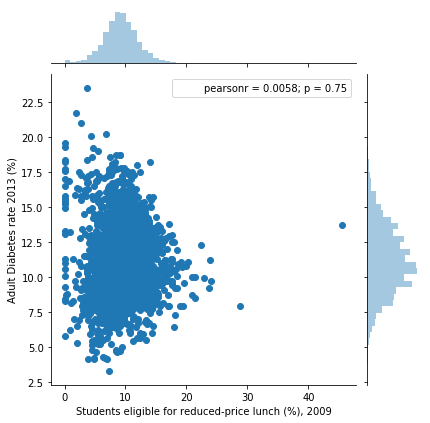

In [38]:
p1 = sns.jointplot(x = 'PCT_REDUCED_LUNCH09', y = 'PCT_DIABETES_ADULTS13', data = main_df)
p1.ax_joint.set_xlabel('Students eligible for reduced-price lunch (%), 2009')
p1.ax_joint.set_ylabel('Adult Diabetes rate 2013 (%)')

Now, we can't observe the correlation anymore. Students from the program that are eligible for reduced-price lunch in the year of 2008-2009, in a household of 4, the familly has to earn less then 39,220 dollars annual (https://www.gpo.gov/fdsys/pkg/FR-2008-04-09/pdf/E8-7475.pdf).

Why this difference is so big? Maybe the very low income of less than 27,560 dollars in 2009 means that the development of diabetes or obesity in this sub-population could not only related to poverty, but also to general and alimentary education at early ages. *I will look for another data set to include education levels into this analysis.

Let's perform a multiple linear regression to fit those variables and validate the model.

In [39]:
# I will use stats model as sklearn was giving me several errors.
import statsmodels.api as sm

C:\Users\jonas\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [96]:
# Let's create X and y.
X_2009 = df3_2009[['PCT_OBESE_ADULTS13', 'PCT_SNAP12', 'PCT_FREE_LUNCH09',
                   'PCT_REDUCED_LUNCH09', 'PCT_SBP09']]
y_2009 = df3_2009[['PCT_DIABETES_ADULTS13']]

Note that I have removed the variables 'PCT_SFSP09', 'PCT_WIC09' and 'PCT_NSLP9' as they have negative coeficients and I am interested in the positive correlation.

In [97]:
# Let's fit and look at the parameters
model_2009 = sm.OLS(y_2009, X_2009).fit()
model_2009.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PCT_DIABETES_ADULTS13   R-squared:                       0.981
Model:                               OLS   Adj. R-squared:                  0.981
Method:                    Least Squares   F-statistic:                 3.210e+04
Date:                   Sat, 28 Apr 2018   Prob (F-statistic):               0.00
Time:                           19:18:00   Log-Likelihood:                -5747.9
No. Observations:                   3067   AIC:                         1.151e+04
Df Residuals:                       3062   BIC:                         1.154e+04
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
PCT_OBESE_ADULTS13      0.2423      0.005     47.798      0.000       0.232       0.252
PCT_SNAP12              0.1416      0.010     13.697      0.000       0.121       0.162
PCT_FREE_LUNCH09        0.0377      0.002     16.617      0.000       0.033       0.042
PCT_REDUCED_LUNCH09     0.0038      0.009      0.435      0.663      -0.013       0.021
PCT_SBP09               0.0022      0.028      0.077      0.939      -0.053       0.058
==============================================================================
Omnibus:                       37.800   Durbin-Watson:                   1.495
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.911
Skew:                           0.000   Prob(JB):                     4.87e-15
Kurtosis:                       3.718   Cond. No.                         57.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can observe high p-value for the reduced lunch variable, confirming its poor association with our model. The School Breakfast Program (SBP) variable have also a high p-value and should be disconsidered for the model.

In [98]:
# Let's remove the high p-value variables
X_2009 = df3_2009[['PCT_OBESE_ADULTS13', 'PCT_SNAP12', 'PCT_FREE_LUNCH09']]
y_2009 = df3_2009[['PCT_DIABETES_ADULTS13']]
model_2009 = sm.OLS(y_2009, X_2009).fit()
model_2009.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PCT_DIABETES_ADULTS13   R-squared:                       0.981
Model:                               OLS   Adj. R-squared:                  0.981
Method:                    Least Squares   F-statistic:                 5.354e+04
Date:                   Sat, 28 Apr 2018   Prob (F-statistic):               0.00
Time:                           19:18:12   Log-Likelihood:                -5748.0
No. Observations:                   3067   AIC:                         1.150e+04
Df Residuals:                       3064   BIC:                         1.152e+04
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
PCT_OBESE_ADULTS13     0.2436      0.004     58.446      0.000       0.235       0.252
PCT_SNAP12             0.1419      0.009     16.027      0.000       0.125       0.159
PCT_FREE_LUNCH09       0.0377      0.002     17.709      0.000       0.034       0.042
==============================================================================
Omnibus:                       37.964   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.285
Skew:                          -0.003   Prob(JB):                     4.04e-15
Kurtosis:                       3.720   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
# As we observed before, poverty poverty rate have a positive relashionship to diabetes/obesity, so let's include it.
df3_2009 = main_df[['PCT_DIABETES_ADULTS13', 'PCT_OBESE_ADULTS13', 'PCT_SNAP12', 'PCT_FREE_LUNCH09','POVRATE15']]
df3_2009.dropna(inplace=True)

X_2009 = df3_2009[['PCT_OBESE_ADULTS13', 'PCT_SNAP12', 'PCT_FREE_LUNCH09', 'POVRATE15']]
y_2009 = df3_2009[['PCT_DIABETES_ADULTS13']]
model_2009 = sm.OLS(y_2009, X_2009).fit()
model_2009.summary()

C:\Users\jonas\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PCT_DIABETES_ADULTS13   R-squared:                       0.981
Model:                               OLS   Adj. R-squared:                  0.981
Method:                    Least Squares   F-statistic:                 4.056e+04
Date:                   Sat, 28 Apr 2018   Prob (F-statistic):               0.00
Time:                           19:22:46   Log-Likelihood:                -5727.8
No. Observations:                   3065   AIC:                         1.146e+04
Df Residuals:                       3061   BIC:                         1.149e+04
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
PCT_OBESE_ADULTS13     0.2418      0.004     57.804      0.000       0.234       0.250
PCT_SNAP12             0.1381      0.009     15.577      0.000       0.121       0.155
PCT_FREE_LUNCH09       0.0298      0.003      9.378      0.000       0.024       0.036
POVRATE15              0.0270      0.008      3.472      0.001       0.012       0.042
==============================================================================
Omnibus:                       28.352   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.849
Skew:                           0.026   Prob(JB):                     1.82e-10
Kurtosis:                       3.590   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Before our final analysis, let's just add a constant intercept to see if the model mantain the R-squared value.

In [105]:
X_2009 = df3_2009[['PCT_OBESE_ADULTS13', 'PCT_SNAP12', 'PCT_FREE_LUNCH09', 'POVRATE15']]
y_2009 = df3_2009[['PCT_DIABETES_ADULTS13']]
X_2009 = sm.add_constant(X_2009)
model_2009 = sm.OLS(y_2009, X_2009).fit()
model_2009.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PCT_DIABETES_ADULTS13   R-squared:                       0.609
Model:                               OLS   Adj. R-squared:                  0.609
Method:                    Least Squares   F-statistic:                     1193.
Date:                   Sat, 28 Apr 2018   Prob (F-statistic):               0.00
Time:                           19:23:13   Log-Likelihood:                -5706.8
No. Observations:                   3065   AIC:                         1.142e+04
Df Residuals:                       3060   BIC:                         1.145e+04
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.3477      0.207     -6.502      0.000      -1.754      -0.941
PCT_OBESE_ADULTS13     0.2788      0.007     39.570      0.000       0.265       0.293
PCT_SNAP12             0.1576      0.009     16.940      0.000       0.139       0.176
PCT_FREE_LUNCH09       0.0270      0.003      8.477      0.000       0.021       0.033
POVRATE15              0.0266      0.008      3.445      0.001       0.011       0.042
==============================================================================
Omnibus:                       28.661   Durbin-Watson:                   1.554
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.817
Skew:                          -0.009   Prob(JB):                     1.12e-10
Kurtosis:                       3.599   Cond. No.                         430.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can observe, the constant intercept reduced the R-squared value significantly, which it is expected and for me would configure a more realistic view of the model. A multi-dimentional factor as diabetes is explained by several and several factors, and using just 3 variables won't be enough.

It is interested to observe that percentage of Supplemental Nutrition Assistance Program (SNAP) have a coeficient of 0.1576, relatively close to our best predictor (obese adults, 0.2788), and greater than the poverty rate (0.0266). This relashionship will be investigated as a future goal.

Another future goal is to analyse those variables filtering by state, to ask whether there are differences and similarities between them.